In [1]:
#import libraries

from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import nltk
import glob
from pathlib import Path
import os
import gensim
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm

In [2]:
import os
base_dir_SF = "/media/secure_volume/full_SF/"
all_docs_SF = []
docs_SF = os.listdir(base_dir_SF)

In [3]:
#checking i can read through
for doc in docs_SF:
    filename_SF = os.fsdecode(doc)
    if not doc.startswith('.'):
        print(os.path.join(base_dir_SF, filename_SF))

/media/secure_volume/full_SF/mdp.39015041541445.txt
/media/secure_volume/full_SF/mdp.49015000553447.txt
/media/secure_volume/full_SF/pst.000066226369.txt
/media/secure_volume/full_SF/mdp.39015002157272.txt
/media/secure_volume/full_SF/uc1.$b808871.txt
/media/secure_volume/full_SF/mdp.39015027480519.txt
/media/secure_volume/full_SF/pst.000021689758.txt
/media/secure_volume/full_SF/mdp.39015077147968.txt
/media/secure_volume/full_SF/mdp.39015024858774.txt
/media/secure_volume/full_SF/pst.000012384730.txt
/media/secure_volume/full_SF/mdp.39015033438634.txt
/media/secure_volume/full_SF/pst.000066152552.txt
/media/secure_volume/full_SF/mdp.39015024771092.txt
/media/secure_volume/full_SF/mdp.39015008173778.txt
/media/secure_volume/full_SF/mdp.49015000704743.txt
/media/secure_volume/full_SF/uc1.32106007872085.txt
/media/secure_volume/full_SF/mdp.39015054402394.txt
/media/secure_volume/full_SF/mdp.39015032481619.txt
/media/secure_volume/full_SF/mdp.39015002131400.txt
/media/secure_volume/full_

In [4]:
#checking number of files is correct
for doc in docs_SF:
    if not doc.startswith('.'):
        with open(base_dir_SF + doc, "r", encoding="utf-8") as file:
            text_SF = file.read()
            all_docs_SF.append(text_SF)
            

len(all_docs_SF)

5162

In [5]:
#setting up tokenizer

tokenizer = TreebankWordTokenizer()
files_SF = glob.glob(f"{base_dir_SF}/.txt")
titles_SF = [Path(file).stem for file in files_SF]

In [6]:
#tokenizer function

def make_sentences_SF(list_text):
    all_txt_SF = []
    counter = 0
    for txt in tqdm(list_text, desc="Preprocessing"):
        lower_txt = txt.lower()
        sentences_SF = sent_tokenize(lower_txt)
        sentences_SF = [tokenizer.tokenize(sent) for sent in sentences_SF]
        all_txt_SF += sentences_SF
        counter += 1
    return all_txt_SF

In [7]:
#preprocessing
sentences_SF = make_sentences_SF(all_docs_SF)

Preprocessing: 100%|██████████████████████| 5162/5162 [2:20:02<00:00,  1.63s/it]


In [8]:
SF_model=gensim.models.Word2Vec(
sentences_SF,
min_count=2,
vector_size=300,
workers=10)

In [19]:
SF_model.save("SF_model")

In [1]:
#to reload model

from gensim.models import Word2Vec
SF_model= Word2Vec.load("SF_model")

In [18]:
SF_model.wv.similarity('sea','dirty')

0.0592016

In [6]:
SF_model.wv.most_similar("creek", topn=5)

[('river', 0.7872284054756165),
 ('brook', 0.7694652080535889),
 ('stream', 0.6848523616790771),
 ('streambed', 0.6796910166740417),
 ('pond', 0.6778465509414673)]

In [20]:
SF_model.wv.most_similar("toxic", topn=5)

[('radioactive', 0.700598955154419),
 ('corrosive', 0.6697120666503906),
 ('poisonous', 0.6694321632385254),
 ('noxious', 0.6665184497833252),
 ('toxins', 0.6622336506843567)]

In [21]:
SF_model.wv.most_similar("water", topn=5)

[('seawater', 0.7707096338272095),
 ('rainwater', 0.71175217628479),
 ('liquid', 0.7098276019096375),
 ('waters', 0.7084758877754211),
 ('sea', 0.6386653184890747)]

In [22]:
SF_model.wv.most_similar("polluted", topn=5)

[('contaminated', 0.7069056630134583),
 ('tainted', 0.6582208871841431),
 ('defiled', 0.5900166630744934),
 ('infested', 0.5884684920310974),
 ('saturated', 0.5856581926345825)]

In [23]:
SF_model.wv.most_similar("pollution", topn=5)

[('pollutants', 0.6413940191268921),
 ('depletion', 0.6150239706039429),
 ('contamination', 0.6124033331871033),
 ('fallout', 0.5878865122795105),
 ('shortages', 0.5858327746391296)]

In [25]:
SF_model.wv.most_similar("catastrophe", topn=5)

[('disaster', 0.8603379130363464),
 ('calamity', 0.8079649806022644),
 ('cataclysm', 0.757978081703186),
 ('tragedy', 0.7074541449546814),
 ('holocaust', 0.6889592409133911)]

In [26]:
SF_model.wv.most_similar("forest", topn=5)

[('woods', 0.839604914188385),
 ('jungle', 0.8207526803016663),
 ('forests', 0.7749780416488647),
 ('woodland', 0.7540220618247986),
 ('wilderness', 0.732917070388794)]

In [29]:
SF_model.wv.similarity('water','toxic')

0.27799222

In [34]:
SF_model.wv.similarity('creek', 'toxic')

0.09756234

In [35]:
SF_model.wv.similarity('stream', 'toxic')

0.15145597

In [30]:
SF_model.wv.similarity('river', 'toxic')

0.098424956

In [31]:
SF_model.wv.similarity('air', 'toxic')

0.18557265

In [32]:
SF_model.wv.similarity('polluted', 'toxic')

0.4204653

In [33]:
SF_model.wv.similarity('forest', 'toxic')

0.08655444

In [11]:
SF_model.wv.similarity('river','sewer')

0.4060129

In [24]:
SF_model.wv.similarity('pollutants','seawater')

0.44076312

In [27]:
SF_model.wv.similarity('stream','poisonous')

0.16787255

In [28]:
SF_model.wv.similarity('radioactive','rainwater')

0.21917664

In [3]:
SF_model.wv.similarity('river','sea')

0.72060174

In [4]:
SF_model.wv.similarity('river','thames')

0.759596

In [29]:
SF_model.wv.similarity('pollution','river')

0.12709266

In [12]:
SF_model.wv.similarity('ocean','sewer')

0.3336288

In [13]:
result = SF_model.wv.most_similar(positive=['river', 'canal'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

creek: 0.6883


In [14]:
result = SF_model.wv.most_similar(positive=['river', 'sewage'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

drainage: 0.5525


In [15]:
result = SF_model.wv.most_similar(positive=['water', 'toxic'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

radioactive: 0.5535


In [16]:
result = SF_model.wv.most_similar(positive=['river', 'flood'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

euphrates: 0.6194


In [17]:
result = SF_model.wv.most_similar(positive=['creek', 'sewer'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

culvert: 0.5082


In [18]:
result = SF_model.wv.most_similar(positive=['river', 'polluted'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

contaminated: 0.5173


In [6]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [10]:
#PLOT STARTS HERE

base_words = ['toxic', 'pollution', 'river', 'water']
toxic_similar_SF = [i[0] for i in SF_model.wv.most_similar(positive='toxic', topn=5)]
pollution_similar_SF = [i[0] for i in SF_model.wv.most_similar(positive='pollution', topn=5)]
river_similar_SF = [i[0] for i in SF_model.wv.most_similar(positive='river', topn=5)]
water_similar_SF = [i[0] for i in SF_model.wv.most_similar(positive='water', topn=5)]

In [15]:
import pandas as pd
pd.set_option('display.max_rows', None)
similarity_words = ['toxic', 'pollution', 'river', 'water', 'sewer', 'foam', 'sewage', 'clean', 'dirty', 'cleanse', 'infect']

#calculate similarities
similarities = []
for word in similarity_words:
    for other_word in similarity_words:
        similarity_score = SF_model.wv.similarity(word, other_word)
        similarities.append((word, other_word, similarity_score))

#Create a data frame
df = pd.DataFrame(similarities,columns=['Word1', 'Word 2', 'Similarity'])
df

,Word1,Word 2,Similarity
0,toxic,toxic,1.000000
1,toxic,pollution,0.522316
2,toxic,river,0.098425
3,toxic,water,0.277992
4,toxic,sewer,0.300601
5,toxic,foam,0.230875
6,toxic,sewage,0.493333
7,toxic,clean,0.159015
8,toxic,dirty,0.135206
9,toxic,cleanse,0.185646


In [13]:
import pandas as pd
similarity_words = ['toxic', 'pollution', 'river', 'water', 'sewer', 'foam', 'sewage', 'clean', 'dirty', 'cleanse', 'infect']

#calculate similarities
similarities = []
for word in base_words:
    for other_word in base_words:
        similarity_score = SF_model.wv.similarity(word, other_word)
        similarities.append((word, other_word, similarity_score))

#Create a data frame
df = pd.DataFrame(similarities,columns=['Word1', 'Word 2', 'Similarity'])
df

,Word1,Word 2,Similarity
0,toxic,toxic,1.000000
1,toxic,pollution,0.522316
2,toxic,river,0.098425
3,toxic,water,0.277992
4,pollution,toxic,0.522316
5,pollution,pollution,1.000000
6,pollution,river,0.127093
7,pollution,water,0.175450
8,river,toxic,0.098425
9,river,pollution,0.127093


In [16]:
#combine lists
all_words_SF = np.hstack((toxic_similar_SF, pollution_similar_SF, river_similar_SF, water_similar_SF, base_words))
print(all_words_SF)

['radioactive' 'corrosive' 'poisonous' 'noxious' 'toxins' 'pollutants'
 'depletion' 'contamination' 'fallout' 'shortages' 'lake' 'stream' 'creek'
 'estuary' 'thames' 'seawater' 'rainwater' 'liquid' 'waters' 'sea' 'toxic'
 'pollution' 'river' 'water']


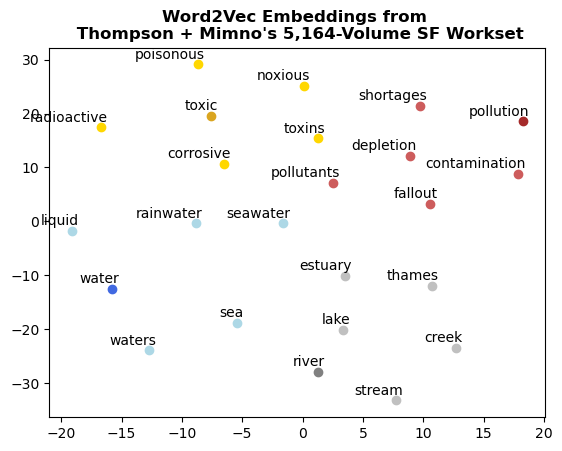

In [23]:
#plot with color coding

labels = [i for i in all_words_SF]
tokens = SF_model.wv[labels]
tokens = tokensastype(float) #this changes the token from float32 to float64

tsne_model = TSNE(init='pca', learning_rate='auto', perplexity=15)
new_values = tsne_model.fit_transform(tokens)

x= []
y= []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
for word in all_words_SF:
    i=labels.index(word)
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    if word in toxic_similar_SF:
        plt.scatter(x[i], y[i], color='gold')
    elif word == 'toxic':
         plt.scatter(x[i], y[i], color='goldenrod')
    elif word in pollution_similar_SF:
         plt.scatter(x[i], y[i], color='indianred')
    elif word == 'pollution':
         plt.scatter(x[i], y[i], color='brown')
    elif word in river_similar_SF:
         plt.scatter(x[i], y[i], color='silver')
    elif word == 'river':
         plt.scatter(x[i], y[i], color='grey')
    elif word in water_similar_SF:
         plt.scatter(x[i], y[i], color='lightblue')
    elif word == 'water':
        plt.scatter(x[i], y[i], color='royalblue')
    plt.title("Word2Vec Embeddings from \n Thompson + Mimno's 5,164-Volume SF Workset", fontweight='bold' )

In [5]:
print(tokens)

NameError: name 'tokens' is not defined